# Regression Linear Model - Multiple Variables
**Objective**: Given the training dataset of home prices based on square footage, bedrooms and age, predict the prices of new homes.

### 1. Import Required Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import linear_model
import os

### 2. Load Dataset

In [56]:
# Change current directory to dataset
os.chdir("/Users/vydang/Documents/Bioinformatics_Side_Projects/Regression_ML_MultipleVariables")

In [57]:
train_df = pd.read_csv("homeprices.csv")
train_df.head(3)

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000


### 3. Explore Data
 - Fill in missing values with median value of the column

In [58]:
median_bedrooms = train_df.bedrooms.median()

In [59]:
train_df.bedrooms = train_df.bedrooms.fillna(median_bedrooms)
train_df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


### 4. Visualize Data

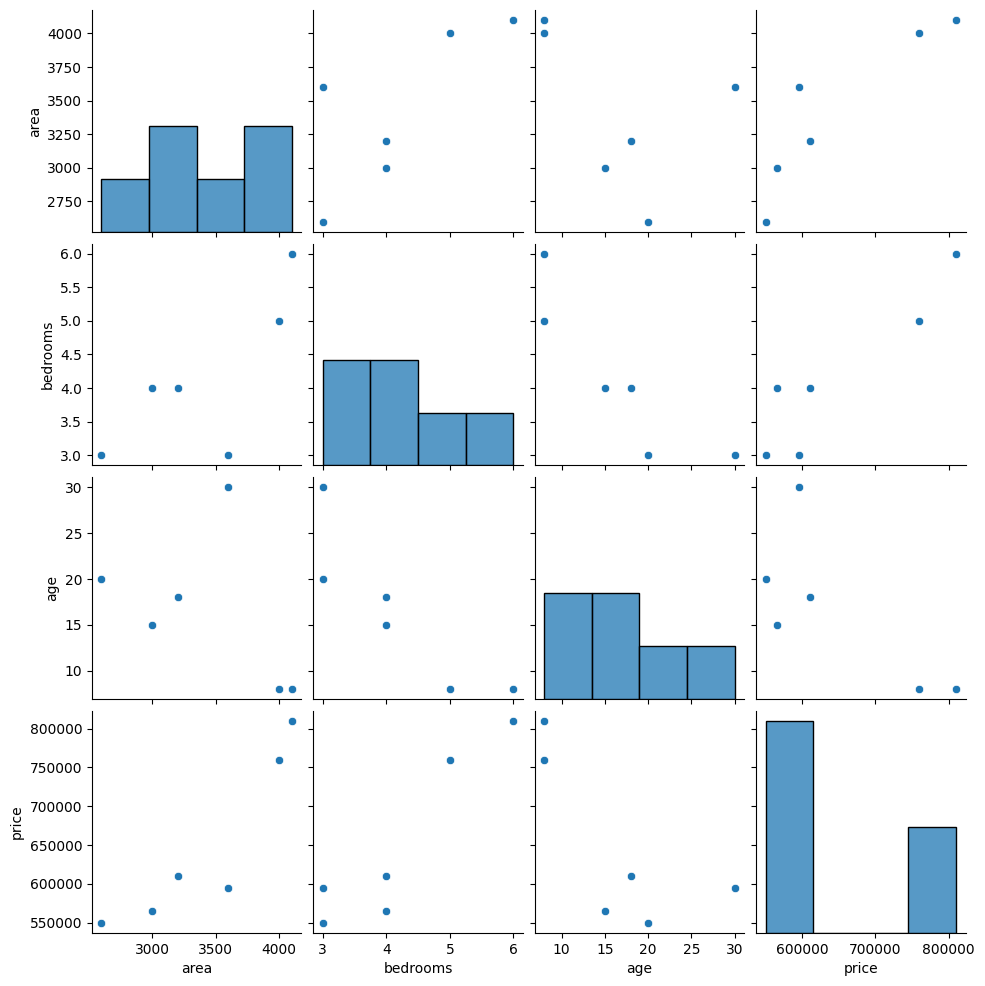

In [61]:
sns.pairplot(train_df)

**Findings of Pairplot**
- Area vs Price: Upward trend, strongest predictor
- Bedroom vs Price: Not consistently rising, weak predictor
- Age vs Price: Weak predictor, younger houses are expensive, older houses tend to be cheaper

<Axes: >

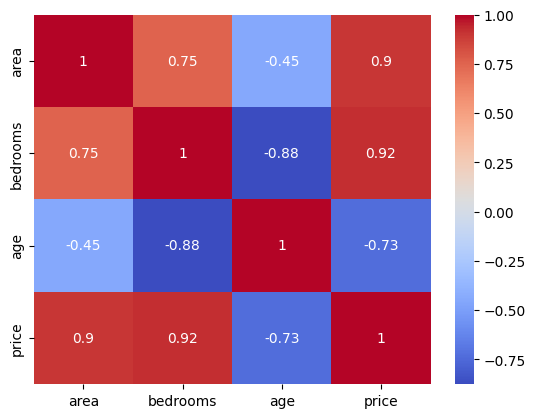

In [62]:
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')

**Findings of Heatmap**
- Area vs Price: Positive relationship
- Bedroom vs Price: Positive relationship
- Age vs Price: Negative relationship

### 5. Create Linear Regression Model & Train

In [60]:
reg = linear_model.LinearRegression()
#train model (x being independent variables and y is the target value)
reg.fit(train_df[['area', 'bedrooms', 'age']], train_df.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 6. Inspect Model Parameters

In [ ]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
reg.intercept_

np.float64(221323.00186540402)

### 7. Make Predictions
- 3000 sq ft, 3 bedrooms and 40 years old
- 2500 sq ft, 4 bedrooms and 5 years old

In [ ]:
reg.predict([[3000, 3, 40]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [ ]:
reg.predict([[2500, 4, 5]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

## Independent Practice
**Objective:** Given hiring statics for a firm, build a model to decide salaries of future candidates based on experience, written test score and interview score

In [63]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import linear_model
import os

In [66]:
pract_df = pd.read_csv('hiring.csv')
pract_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [70]:
# Fill in null values in experience to 'zero'
pract_df.experience = pract_df.experience.fillna('zero')
# Fill in null values in test_score to be the median
median_testscore = pract_df[['test_score(out of 10)']].median()
pract_df[['test_score(out of 10)']] = pract_df[['test_score(out of 10)']].fillna(median_testscore)
pract_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [71]:
pract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      object 
 1   test_score(out of 10)       8 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [72]:
# Convert object data type in experience to integer
word_to_num = { 'zero':0, 'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8, 'nine':9, 'ten':10, 'eleven':11}
pract_df['experience'] = pract_df['experience'].map(word_to_num)
pract_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [73]:
pract_reg = linear_model.LinearRegression()
#train model (x being independent variables and y is the target value)
pract_reg.fit(pract_df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], pract_df[['salary($)']])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Predict salary for candidate with 2 yr experience, 9 test score, and 6 interview score
pract_reg.predict([[2, 9, 6]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[53205.96797671]])

In [ ]:
# Predict salary for candidate with 12 year experience, 10 test score, and 10 interview score
pract_reg.predict([[12, 10, 10]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[92002.18340611]])